In [10]:
#A1 and A2

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the dataset
def load_data(file_path):
    return pd.read_excel(file_path)

# Split the data into features and target
def split_data(df, feature_column, target_column, test_size=0.2, random_state=42):
    X = df[[feature_column]]  # Use double brackets for a DataFrame with one feature column
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train the linear regression model
def train_linear_regression(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    return reg

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Load the dataset
file_path = "C:\\Users\\Administrator\\Documents\\ML_bird_project\\bird_species_features (1).xlsx"
df = load_data(file_path)

# Define feature and target columns (use actual column names from your dataset)
feature_column = 'feature_1'  # Replace with actual feature column name
target_column = 'feature_0'   # Replace with actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df, feature_column, target_column)

# Train the linear regression model
reg = train_linear_regression(X_train, y_train)

# Make predictions on training data
y_train_pred = reg.predict(X_train)

# Make predictions on testing data
y_test_pred = reg.predict(X_test)

# Evaluate model on training data
train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAPE: {train_mape}")
print(f"Training R2: {train_r2}")

# Evaluate model on testing data
test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")


Training MSE: 1.0024262467196432
Training RMSE: 1.0012123884169848
Training MAPE: 427560845.5846444
Training R2: 0.0005976191802974373
Test MSE: 0.9864389501621433
Test RMSE: 0.9931963301191479
Test MAPE: 1.0427162456465406
Test R2: 0.0012825278049292121


In [16]:
#A3

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load the dataset
def load_data(file_path):
    return pd.read_excel(file_path)

# Split the data into features and target
def split_data(df, target_column, test_size=0.2, random_state=42):
    # Automatically select all columns except the target column
    feature_columns = [col for col in df.columns if col != target_column]
    X = df[feature_columns]
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train the linear regression model
def train_linear_regression(X_train, y_train):
    reg = LinearRegression().fit(X_train, y_train)
    return reg

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Load the dataset
file_path = "C:\\Users\\Administrator\\Documents\\ML_bird_project\\bird_species_features (1).xlsx"
df = load_data(file_path)

# Handle non-numeric data
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])

# Check if the target column is in the remaining columns
target_column = 'feature_0'  # Replace with the actual target column name
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df, target_column)

# Train the linear regression model
reg = train_linear_regression(X_train, y_train)

# Make predictions on training data
y_train_pred = reg.predict(X_train)

# Make predictions on testing data
y_test_pred = reg.predict(X_test)

# Evaluate model on training data
train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)
print(f"Training MSE: {train_mse}")
print(f"Training RMSE: {train_rmse}")
print(f"Training MAPE: {train_mape}")
print(f"Training R2: {train_r2}")

# Evaluate model on testing data
test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAPE: {test_mape}")
print(f"Test R2: {test_r2}")


Training MSE: 0.20186375914812266
Training RMSE: 0.449292509561558
Training MAPE: 7615819667.634354
Training R2: 0.7987451723714972
Test MSE: 0.2009741719741224
Test RMSE: 0.44830142981494314
Test MAPE: 2.026739846971737
Test R2: 0.7965242380407822


Clustered data saved to 'bird_species_clustered_simple.xlsx'.


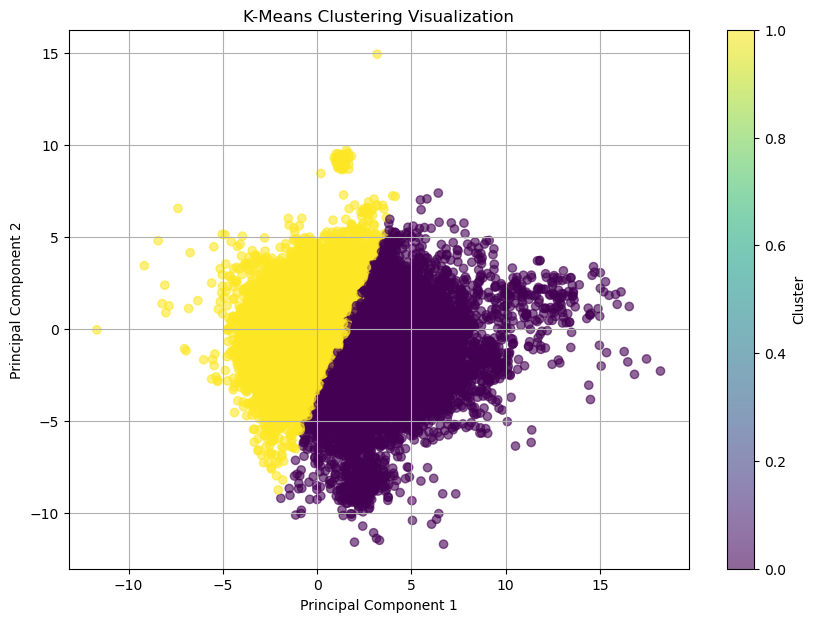

In [18]:
#A4
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the features dataset
file_path = "C:\\Users\\Administrator\\Documents\\ML_bird_project\\bird_species_features (1).xlsx"
features_df = pd.read_excel(file_path)

# Extract features for clustering (assuming columns to cluster start from the third column)
X = features_df.iloc[:, 2:].values  # Adjust indices if needed

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply K-Means clustering with a predefined number of clusters (e.g., 2)
kmeans = KMeans(n_clusters=2, random_state=100, n_init="auto")
clusters = kmeans.fit_predict(X_normalized)

# Add the cluster labels to the original DataFrame
features_df['cluster'] = clusters

# Save the DataFrame with cluster labels
features_df.to_excel('bird_species_clustered_simple.xlsx', index=False)
print("Clustered data saved to 'bird_species_clustered_simple.xlsx'.")

# Optional: Visualize the clusters (2D plot using the first two features)
# For visualization, we need to reduce dimensionality if there are more than 2 features
if X_normalized.shape[1] > 2:
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X_normalized)
else:
    X_reduced = X_normalized

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1' if X_normalized.shape[1] > 2 else 'Feature 1')
plt.ylabel('Principal Component 2' if X_normalized.shape[1] > 2 else 'Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
